In [1]:
import h5py
import numpy as np
import phenograph
import time
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
! ls -l ../simulated/23-02-2018/

total 150616
drwxrwx---  9 mtuncel mtuncel-group     4096 Feb 23 15:24 analysis
drwxrwx--- 13 mtuncel mtuncel-group     4096 Feb 23 15:24 log
-rw-rw----  1 mtuncel mtuncel-group  7137020 Feb 23 14:26 melanomaS2_sim_loc0.25.h5
-rw-rw----  1 mtuncel mtuncel-group 10076078 Feb 23 14:42 melanomaS2_sim_loc0.25_zheng17.h5
-rw-rw----  1 mtuncel mtuncel-group  7140589 Feb 23 14:38 melanomaS2_sim_loc0.5.h5
-rw-rw----  1 mtuncel mtuncel-group 10086116 Feb 23 14:42 melanomaS2_sim_loc0.5_zheng17.h5
-rw-rw----  1 mtuncel mtuncel-group  7125243 Feb 23 14:26 melanomaS2_sim_loc0.75.h5
-rw-rw----  1 mtuncel mtuncel-group 10086116 Feb 23 14:42 melanomaS2_sim_loc0.75_zheng17.h5
-rw-rw----  1 mtuncel mtuncel-group  7078790 Feb 23 14:25 melanomaS2_sim_loc1.25.h5
-rw-rw----  1 mtuncel mtuncel-group 10086116 Feb 23 14:42 melanomaS2_sim_loc1.25_zheng17.h5
-rw-rw----  1 mtuncel mtuncel-group  7038040 Feb 23 14:26 melanomaS2_sim_loc1.5.h5
-rw-rw----  1 mtuncel mtuncel-group 10076078 Feb 23 14:42 melanomaS2_sim_

In [3]:
input_file = '../simulated/23-02-2018/melanomaS2_sim_loc3_zheng17.h5'

In [4]:
h5f = h5py.File(input_file, 'r')
matrix = h5f['matrix'][:]
barcodes = h5f['cell_attrs']['cell_names'].value
h5f.close()
#matrix = np.log1p(matrix)

In [5]:
X_tsne = TSNE(n_components=2,init='pca', verbose = 2).fit_transform(matrix)
X_pca = PCA().fit_transform(matrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2495 samples in 0.054s...
[t-SNE] Computed neighbors for 2495 samples in 3.902s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2495
[t-SNE] Computed conditional probabilities for sample 2000 / 2495
[t-SNE] Computed conditional probabilities for sample 2495 / 2495
[t-SNE] Mean sigma: 136.235435
[t-SNE] Computed conditional probabilities in 0.170s
[t-SNE] Iteration 50: error = 79.4435349, gradient norm = 0.0274429 (50 iterations in 2.262s)
[t-SNE] Iteration 100: error = 84.1061096, gradient norm = 0.0446970 (50 iterations in 2.138s)
[t-SNE] Iteration 150: error = 85.1553040, gradient norm = 0.0417536 (50 iterations in 1.993s)
[t-SNE] Iteration 200: error = 87.1461563, gradient norm = 0.0515795 (50 iterations in 1.947s)
[t-SNE] Iteration 250: error = 86.7518539, gradient norm = 0.0328607 (50 iterations in 1.925s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.751854
[t-SNE] Iteration 300: er

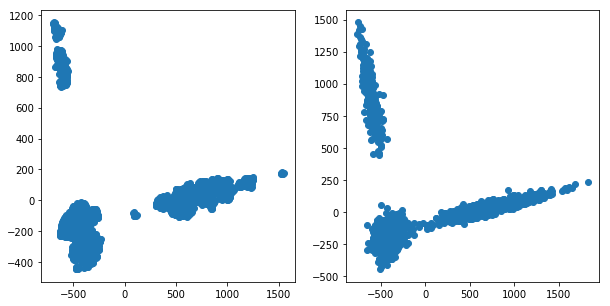

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1])